### 2. بررسی تفاوت ارزش خانه های شهری و روستایی

In [7]:
import numpy as np
import pandas as pd

In [8]:
def calc_houses_value(file_name):
    df_house_price = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P3S04')
    return df_house_price    

In [9]:
R98_house_price = calc_houses_value('R98.xlsx')
R98_house_price.head()

,Address,code,mortgage,purchased,value
0,20011395420,42111,NaN,NaN,1000000
1,20011395420,44418,NaN,1,20000
2,20011395420,45111,NaN,1,350000
3,20011395420,45211,NaN,1,200000
4,20001385412,42111,NaN,NaN,1500000


In [10]:
R99_house_price = calc_houses_value('R99.xlsx')
R99_house_price.head()

,Address,code,mortgage,purchased,value
0,20011394629,42111,NaN,NaN,3000000
1,20011394629,44111,NaN,1,150000
2,20011394629,44418,NaN,1,80000
3,20011394629,45111,NaN,1,160000
4,20011394629,45211,NaN,1,80000


In [11]:
R1400_house_price = calc_houses_value('R1400.xlsx')
R1400_house_price.head()

,Address,code,mortgage,purchased,value
0,20001384220,42111,NaN,NaN,23000000
1,20001384220,44111,NaN,1,245000
2,20001384220,45111,NaN,1,317000
3,20001384220,45211,NaN,1,396000
4,20001384225,42111,NaN,NaN,9000000


In [12]:
R1401_house_price = calc_houses_value('R1401.xlsx')
R1401_house_price.head()

,Address,code,mortgage,purchased,value
0,20001384225,44111,,1,300000
1,20001384225,45111,,1,360000
2,20001384225,45211,,1,460000
3,20001384225,42111,,,11000000
4,20001384229,41111,,1,7000000


In [13]:
U98_house_price = calc_houses_value('U98.xlsx')
U98_house_price.head()

,Address,code,mortgage,purchased,value
0,10004004223,42111,NaN,NaN,8000000
1,10004004223,44111,NaN,1,200000
2,10004004223,44311,NaN,1,100000
3,10004004223,45111,NaN,1,400000
4,10004004223,45211,NaN,1,200000


In [14]:
U99_house_price = calc_houses_value('U99.xlsx')
U99_house_price.head()

,Address,code,mortgage,purchased,value
0,10009008517,42111,NaN,NaN,8000000
1,10009008517,44111,NaN,1,160000
2,10009008517,45111,NaN,1,320000
3,10009008517,45211,NaN,1,196000
4,10009008518,42111,NaN,NaN,7000000


In [15]:
U1400_house_price = calc_houses_value('U1400.xlsx')
U1400_house_price.head()

,Address,code,mortgage,purchased,value
0,10011009725,42214,NaN,8,7000000
1,10011009725,44111,NaN,1,250000
2,10011009725,45111,NaN,1,330000
3,10011009725,45211,NaN,1,220000
4,10003003235,41111,NaN,1,5000000


In [16]:
U1401_house_price = calc_houses_value('U1401.xlsx')
U1401_house_price.head()

,Address,code,mortgage,purchased,value
0,10001000226,41111,,1,20000000
1,10001000226,42212,0100000000,1,3000000
2,10001000226,44111,,1,300000
3,10001000226,45111,,1,300000
4,10001000226,45211,,1,50000


### مقایسه قیمت خانه های شهری و روستایی سال 1398

In [17]:
R98_house_price['value'].mean(), U98_house_price['value'].mean()

(969446.108700394, 2128747.865530435)

In [18]:
R98_house_price['value'].std(), U98_house_price['value'].std()

(1722758.221371, 5319004.87229648)

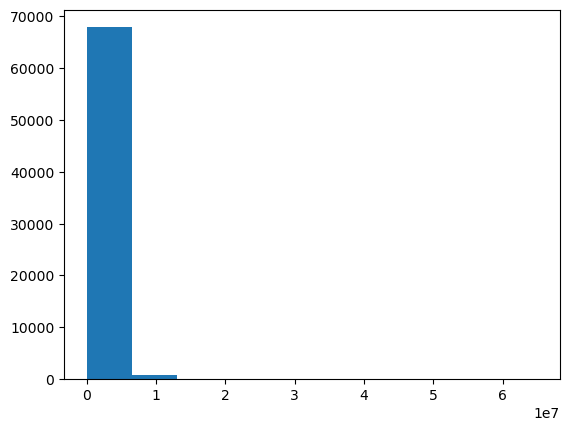

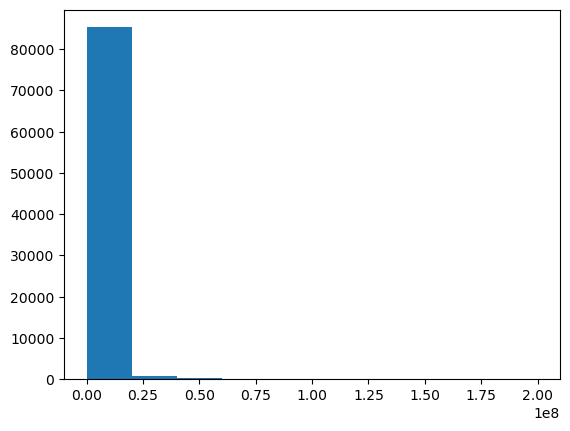

In [19]:
import matplotlib.pyplot as plt

plt.hist(R98_house_price['value'])
plt.show()
plt.hist(U98_house_price['value'])
plt.show()

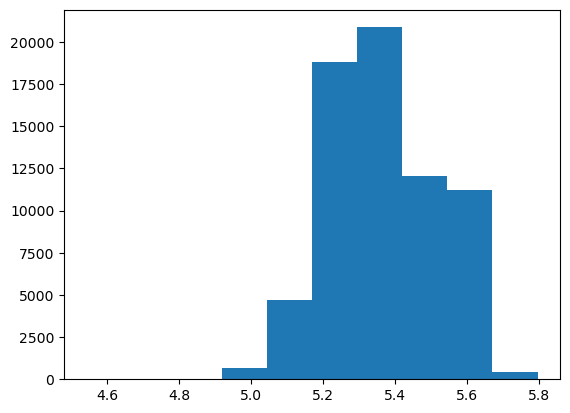

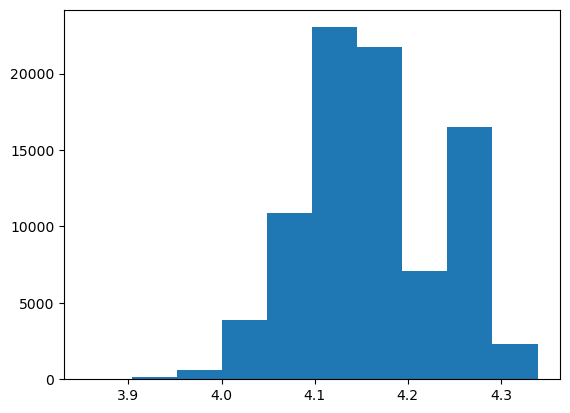

In [20]:
from scipy import stats

R98_house_price_normal, _ = stats.yeojohnson(R98_house_price['value'])
U98_house_price_normal, _ = stats.yeojohnson(U98_house_price['value'])

plt.hist(R98_house_price_normal, bins=10)
plt.show()
plt.hist(U98_house_price_normal, bins=10)
plt.show()

In [23]:
from scipy.stats import shapiro, mannwhitneyu

shapiro(R98_house_price_normal), shapiro(U98_house_price_normal)

c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68767.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 86250.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.9865211207958338, pvalue=3.243205880990617e-58),
 ShapiroResult(statistic=0.97007429890517, pvalue=5.477588628099235e-79))

چون داده هنوز نرمال نشده است از تست های آماری دیگری استفاده می کنیم

In [24]:
#from scipy import stats

#n1 = len(U98_house_price['value'])
#n2 = len(R98_house_price['value'])
#x1 = U98_house_price['value'].mean()
#x2 = R98_house_price['value'].mean()
#s1 = U98_house_price['value'].std(ddof=1)
#s2 = R98_house_price['value'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [26]:
u_stat, p_value = mannwhitneyu(R98_house_price['value'], U98_house_price['value'])
u_stat, p_value

(2842950035.5, 1.2987503136187692e-44)

چون مقدار متغیر پی از 0.05 کمتر است، در نتیجه فرض اولیه مبنی بر تساوی ارزش خانه های شهری و روستایی رد شده و نتیجه می شود که این دو گروه در سال 1398 با هم برابر نیستند

### مقایسه ارزش خانه های شهری و روستایی سال 1399

In [27]:
R99_house_price['value'].mean(), U99_house_price['value'].mean()

(1337254.2374977912, 2887546.2615338704)

In [28]:
R99_house_price['value'].std(), U99_house_price['value'].std()

(2453432.433038401, 7694625.040649703)

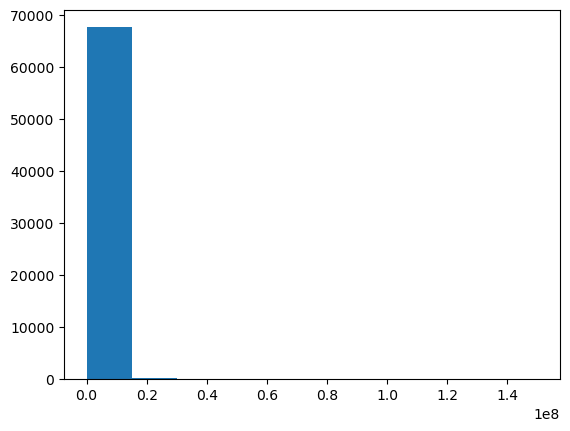

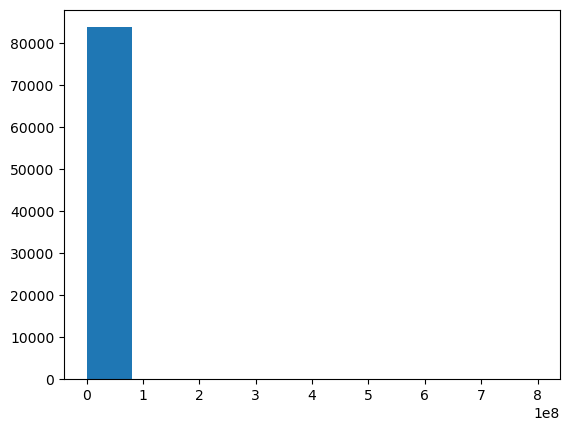

In [29]:
plt.hist(R99_house_price['value'])
plt.show()
plt.hist(U99_house_price['value'])
plt.show()

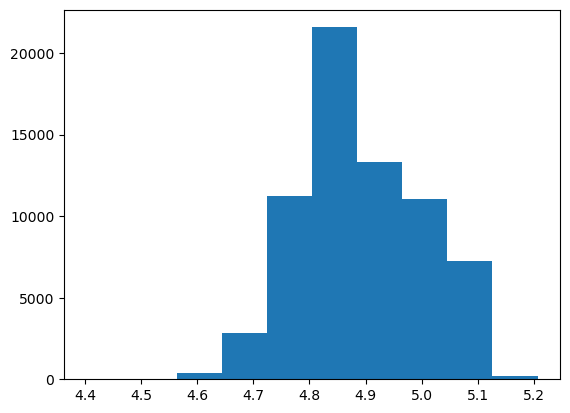

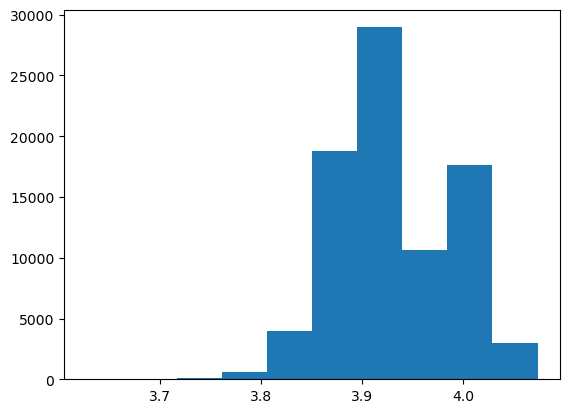

In [30]:
R99_house_price_normal, _ = stats.yeojohnson(R99_house_price['value'])
U99_house_price_normal, _ = stats.yeojohnson(U99_house_price['value'])

plt.hist(R99_house_price_normal, bins=10)
plt.show()
plt.hist(U99_house_price_normal, bins=10)
plt.show()

In [31]:
shapiro(R99_house_price_normal), shapiro(U99_house_price_normal)

c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 67908.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 83775.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.9803275872911358, pvalue=1.297700480708717e-65),
 ShapiroResult(statistic=0.9642014764865078, pvalue=1.359481778206479e-82))

چون داده هنوز نرمال نشده است از تست های آماری دیگری استفاده می کنیم

In [32]:
#from scipy import stats

#n1 = len(U98_house_price['value'])
#n2 = len(R98_house_price['value'])
#x1 = U98_house_price['value'].mean()
#x2 = R98_house_price['value'].mean()
#s1 = U98_house_price['value'].std(ddof=1)
#s2 = R98_house_price['value'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [33]:
u_stat, p_value = mannwhitneyu(R99_house_price['value'], U99_house_price['value'])
u_stat, p_value

(2746798998.0, 1.0025276057547736e-30)

چون مقدار متغیر پی از 0.05 کمتر است، در نتیجه فرض اولیه مبنی بر تساوی ارزش خانه های شهری و روستایی رد شده و نتیجه می شود که این دو گروه در سال 1399 با هم برابر نیستند

### مقایسه ارزش خانه های شهری و روستایی سال 1400

In [35]:
R1400_house_price['value'].mean(), U1400_house_price['value'].mean()

(1962088.3979624186, 4206407.823746948)

In [36]:
R1400_house_price['value'].std(), U1400_house_price['value'].std()

(3906604.276189736, 10326799.932652496)

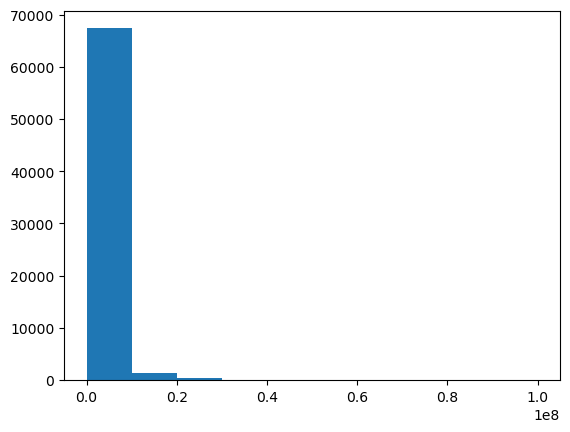

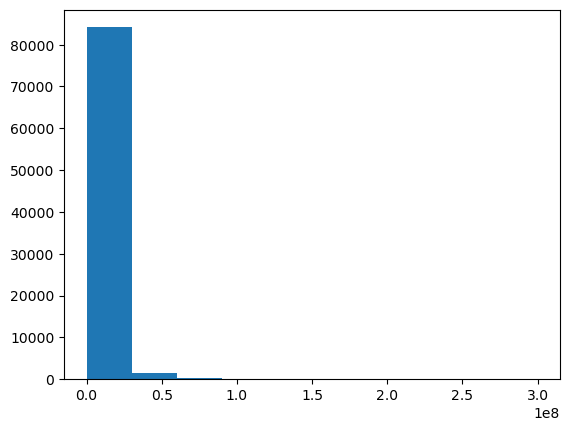

In [37]:
plt.hist(R1400_house_price['value'])
plt.show()
plt.hist(U1400_house_price['value'])
plt.show()

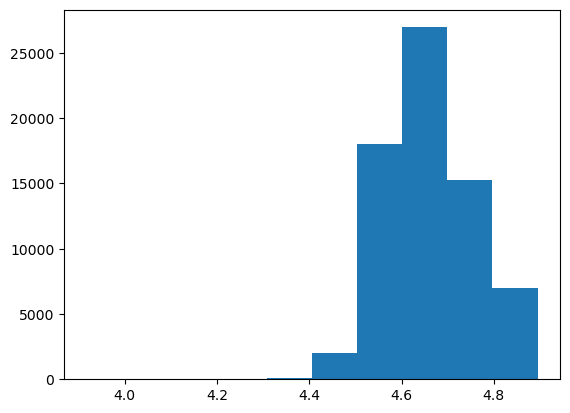

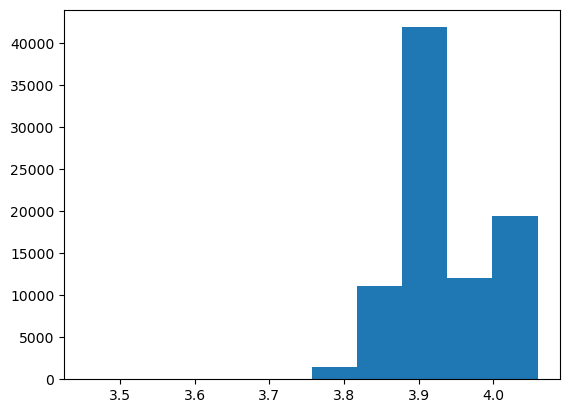

In [38]:
R1400_house_price_normal, _ = stats.yeojohnson(R1400_house_price['value'])
U1400_house_price_normal, _ = stats.yeojohnson(U1400_house_price['value'])

plt.hist(R1400_house_price_normal, bins=10)
plt.show()
plt.hist(U1400_house_price_normal, bins=10)
plt.show()

In [39]:
shapiro(R1400_house_price_normal), shapiro(U1400_house_price_normal)

c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 69396.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 85990.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.9695025677660608, pvalue=2.0053071403180634e-75),
 ShapiroResult(statistic=0.9510326719744746, pvalue=1.3251819334470257e-90))

چون داده هنوز نرمال نشده است از تست های آماری دیگری استفاده می کنیم

In [40]:
#from scipy import stats

#n1 = len(U98_house_price['value'])
#n2 = len(R98_house_price['value'])
#x1 = U98_house_price['value'].mean()
#x2 = R98_house_price['value'].mean()
#s1 = U98_house_price['value'].std(ddof=1)
#s2 = R98_house_price['value'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [41]:
u_stat, p_value = mannwhitneyu(R1400_house_price['value'], U1400_house_price['value'])
u_stat, p_value

(2910735477.5, 1.0373125437639164e-16)

چون مقدار متغیر پی از 0.05 کمتر است، در نتیجه فرض اولیه مبنی بر تساوی ارزش خانه های شهری و روستایی رد شده و نتیجه می شود که این دو گروه در سال 1400 با هم برابر نیستند

### مقایسه ارزش خانه های شهری و روستایی سال 1401

In [44]:
R1401_house_price['value'].mean(), U1401_house_price['value'].mean()

(3019351.729213467, 6594069.247600106)

In [45]:
R1401_house_price['value'].std(), U1401_house_price['value'].std()

(6399271.123198388, 16229483.615343092)

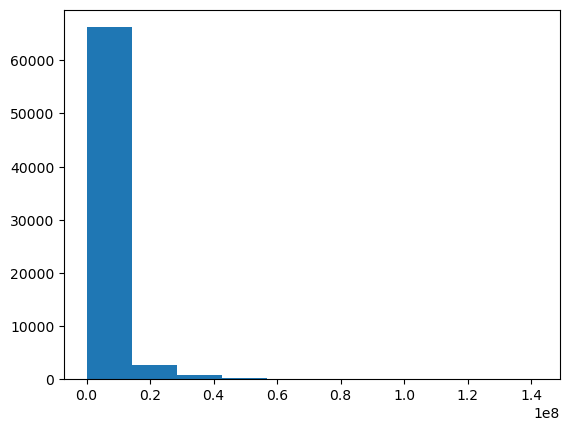

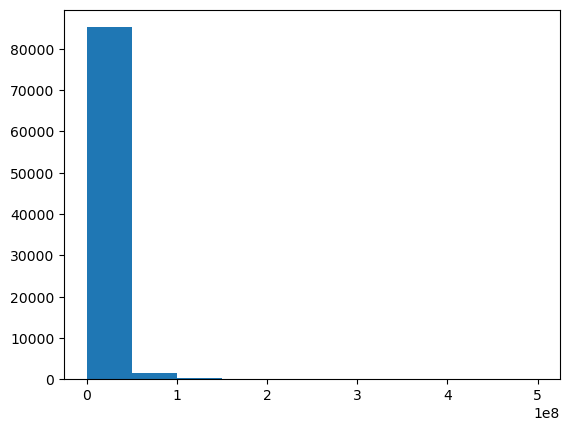

In [46]:
plt.hist(R1401_house_price['value'])
plt.show()
plt.hist(U1401_house_price['value'])
plt.show()

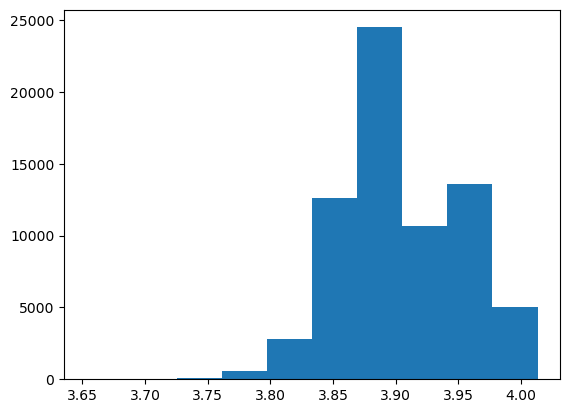

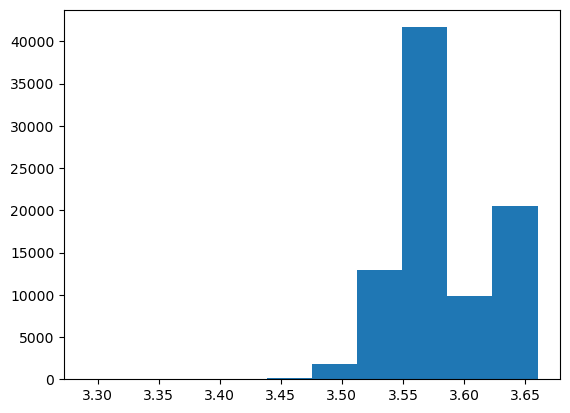

In [47]:
R1401_house_price_normal, _ = stats.yeojohnson(R1401_house_price['value'])
U1401_house_price_normal, _ = stats.yeojohnson(U1401_house_price['value'])

plt.hist(R1401_house_price_normal, bins=10)
plt.show()
plt.hist(U1401_house_price_normal, bins=10)
plt.show()

In [48]:
shapiro(R1401_house_price_normal), shapiro(U1401_house_price_normal)

c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 69889.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 86983.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.966862611636391, pvalue=2.038675692221791e-77),
 ShapiroResult(statistic=0.9487956112805237, pvalue=6.224779947259652e-92))

چون داده هنوز نرمال نشده است از تست های آماری دیگری استفاده می کنیم

In [49]:
#from scipy import stats

#n1 = len(U98_house_price['value'])
#n2 = len(R98_house_price['value'])
#x1 = U98_house_price['value'].mean()
#x2 = R98_house_price['value'].mean()
#s1 = U98_house_price['value'].std(ddof=1)
#s2 = R98_house_price['value'].std(ddof=1)

#degree_of_freedom = n1 + n2 - 2
#t_value = (x1 - x2) / np.sqrt((s1 ** 2) / n1 + (s2 ** 2) / n2)
#p_value = 1 - stats.t.cdf(t_value, degree_of_freedom)

#t_value, p_value

In [50]:
u_stat, p_value = mannwhitneyu(R1401_house_price['value'], U1401_house_price['value'])
u_stat, p_value

(2952452004.0, 1.4238866834422309e-22)

چون مقدار متغیر پی از 0.05 کمتر است، در نتیجه فرض اولیه مبنی بر تساوی ارزش خانه های شهری و روستایی رد شده و نتیجه می شود که این دو گروه در سال 1401 با هم برابر نیستند